<a href="https://www.kaggle.com/code/rinichristy/multiple-linear-regression-on-co2-emission?scriptVersionId=92354855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Multiple Linear Regression (MLR) on Carbon dioxide emission of vehicles**

## **Table of Contents**

* [Data Exploration (EDA)](#EDA)
* [Model Development](#Model)
* [Model Evaluation](#Evaluation)

## **Importing the required packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Dataset Information**
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

## **Load the Fuel Consumption dataset**

In [2]:
df = pd.read_csv("../input/2022-fuel-consumption-ratings/MY2022 Fuel Consumption Ratings.csv")
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## **Data Exploration**<a name="EDA"></a>

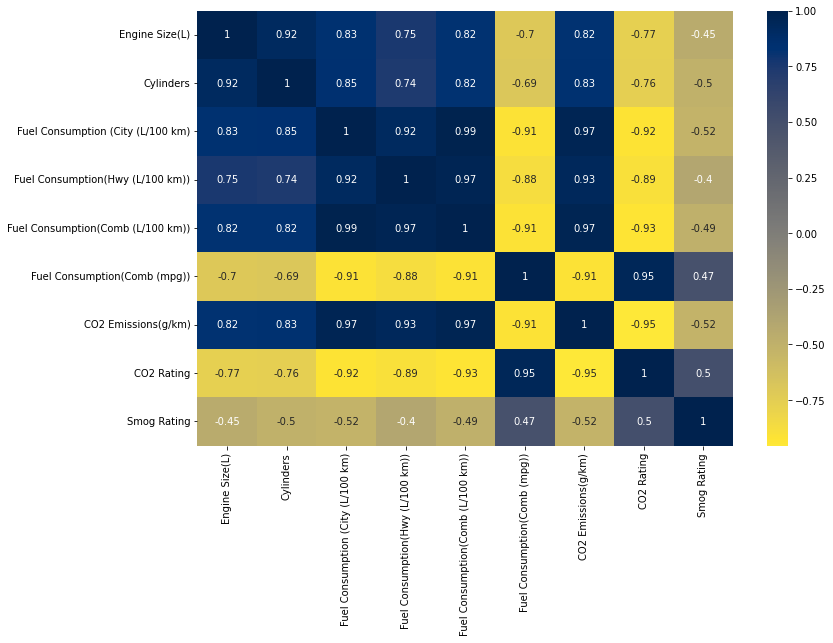

In [3]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Model Year'], axis = 1).corr(), cmap="cividis_r", annot = True);

**P-value:**

In statistical analysis P-value is used to know the significance of the correlation estimate.The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
* p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
* p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
* p-value is $>$ 0.1: there is no evidence that the correlation is significant.

This information is obtained using "stats" module in the "scipy" library.

In [4]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is 0.833240570133112  with a P-value of P = 3.6276159873873733e-245
The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is 0.8241875694085823  with a P-value of P = 2.4338710526790506e-235
The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is 0.8217180823738502  with a P-value of P = 9.314329241215394e-233
The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is 0.8186935336201379  with a P-value of P = 1.198288656221755e-229


#### **ANOVA: Analysis of Variance**
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA can be used to find the correlation between different groups of a categorical variable. 

ANOVA returns two parameters:

* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. The F-test calculates the ratio of variation between groups means over the variation within each of the sample group means.  A larger score means there is a larger difference between the means.
* P-value: P-value tells how statistically significant is our calculated score value.
If the emission variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [5]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 3],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 4],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 5],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 6],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 8],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 10],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 12],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 16])

F_onewayResult(statistic=321.2813100475542, pvalue=4.589761627416592e-244)

In [6]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'X'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'D'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'Z'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=35.48640509656308, pvalue=9.88191995336441e-22)

In [7]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'X'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'D'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'Z'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=65.34018094901431, pvalue=2.1920897177077466e-38)

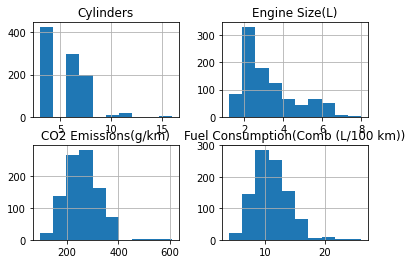

In [8]:
viz = df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
viz.hist()
plt.show()

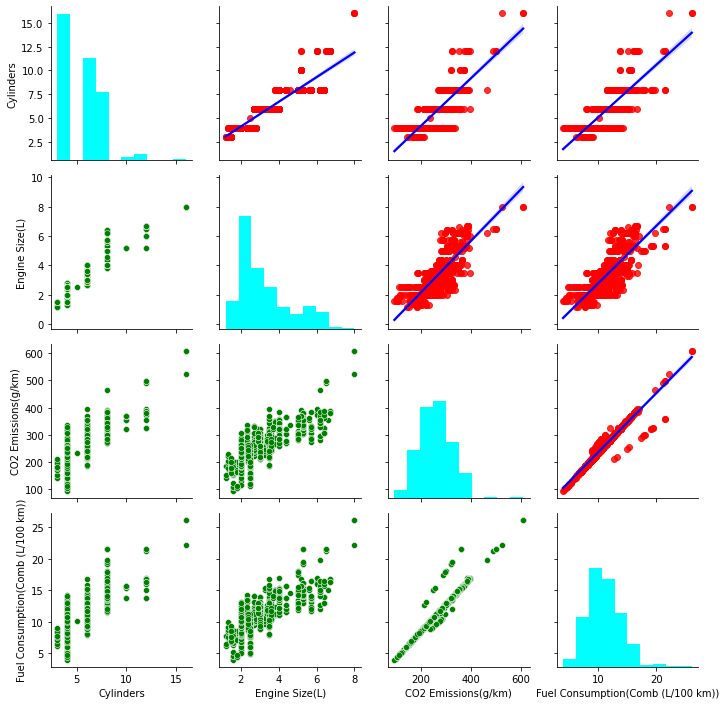

In [9]:
g = sns.PairGrid(df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']])
g.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist, color ='cyan');

## **Model Development: Multiple Linear Regression**<a name="Model"></a>
When a dependent variable is predicted with more than one independent variable, the method is termed as multiple linear regression. In this project, co2emission is predicted  using FUELCONSUMPTION_COMB, EngineSize and Cylinders of vehicles. In other words,  Multiple linear regression is considered as an extension of simple linear regression model.

### **Building model using train and test datasets created after Train/Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. 
One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that he outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Split the entire dataset into 80% for training, and the 20% for testing. Create a mask to select random rows using np.random.rand() function:

In [10]:
msk = np.random.rand(len(df)) < 0.8
msk[0:20]

array([ True, False,  True, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True])

In [11]:
df_model = df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
train = df_model[msk]
test = df_model[~msk]
X_train = train[['Cylinders','Engine Size(L)','Fuel Consumption(Comb (L/100 km))']]
y_train = train['CO2 Emissions(g/km)']
X_test = test[['Cylinders','Engine Size(L)','Fuel Consumption(Comb (L/100 km))']]
y_test = test['CO2 Emissions(g/km)']   

from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  17.653538545739252
The Coefficients of mutiple linear regression model is:  [ 2.92710754  0.24620127 20.2373668 ]


Scikit-learn uses plain Ordinary Least Squares method to find parameters like the intercept and coefficients of hyperplane. 

**Ordinary Least Squares (OLS)**

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and the predicted output ( y^ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

A final linear model with the structure should be obtained:
$$
Yhat=a + bX + cX + dx
$$
Plugging in the actual values to obtain the linear function.

$$
CO2 Emissions(g/km) = 20.95 + 3.13 x  Cylinders + 0.89 x Engine Size(L) + 19.58 x Fuel Consumption(Comb (L/100 km))
$$

## Model Evaluation<a name="Evaluation"></a>
Model evaluation is done by comparing the predicted values with the actual values and  the difference is used to calculate the accuracy of a regression model. 

There are different methods of model evaluation metrics as follows: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
    <li> Total sum of squares (tss): Sum of squares of difference between the mean value and the actual value.
    <li> Residual sum of squares (rss): Sum of residuals squared
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
    
    R-squared: 1 - (rss/tss)
</ul>
<ul>
    <li> Explained Variance Score = 1 - [Variance(Ypredicted - Yactual) / Variance(Yactual)] </li>
    __explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.
</ul>

In [12]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 6.157884760585493
Mean Squared Error(MSE) of Multiple Linear regression: 256.35079727800024
Root Mean Squared Error (RMSE) of Multiple Linear regression: 16.010958662053945
Variance score of Multiple Linear regression: 0.95
Explained Variance Score (EVS) of Multiple Linear regression: 0.9267800921753421
Residual sum of squares of Multiple Linear regression: 256.35
R2 of Multiple Linear regression: 0.9261455244770858
R2 rounded of Multiple Linear regression: 0.93
Adjusted_r2 of Multiple Linear regression:  0.925
Accuracy of Multiple Linear regression: 0.9261455244770858


### **Summary statistics of Train set**

In [13]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.953
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                     4896.
Date:                 Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                         11:38:35   Log-Likelihood:                -2991.7
No. Observations:                  733   AIC:                             5991.
Df Residuals:                      729   BIC:                             6010.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

**Backward Elimination: Removing the least significant variable from the model**

From the statistics summary above, it seems the Engine size is not a statistically significant features of CO2 emission prediction. Backward Elimination is irrelevant in Python, because the Scikit-Learn library automatically takes care of selecting the statistically significant features when training the model to make accurate predictions. Eventhough that's the case trying for it just to make sure to see any improvement in accuracy. 

In [14]:
df_model = df[['Cylinders','Engine Size(L)', 'CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
train = df_model[msk]
test = df_model[~msk]
X_train = train[['Cylinders','Fuel Consumption(Comb (L/100 km))']]
y_train = train['CO2 Emissions(g/km)']
X_test = test[['Cylinders','Fuel Consumption(Comb (L/100 km))']]
y_test = test['CO2 Emissions(g/km)']   

from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  17.456731005251584
The Coefficients of mutiple linear regression model is:  [ 3.05928782 20.25825016]


In [15]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.953
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                     7353.
Date:                 Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                         11:38:35   Log-Likelihood:                -2991.7
No. Observations:                  733   AIC:                             5989.
Df Residuals:                      730   BIC:                             6003.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [16]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 6.176266345122193
Mean Squared Error(MSE) of Multiple Linear regression: 256.6008448182909
Root Mean Squared Error (RMSE) of Multiple Linear regression: 16.018765396193643
Variance score of Multiple Linear regression: 0.95
Explained Variance Score (EVS) of Multiple Linear regression: 0.926694861667378
Residual sum of squares of Multiple Linear regression: 256.60
R2 of Multiple Linear regression: 0.9260734859652495
R2 rounded of Multiple Linear regression: 0.93
Adjusted_r2 of Multiple Linear regression:  0.925
Accuracy of Multiple Linear regression: 0.9260734859652495


### **Summary statistics of Test set**

In [17]:
import statsmodels.api as sm
X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.930
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                     1394.
Date:                 Thu, 07 Apr 2022   Prob (F-statistic):          5.78e-122
Time:                         11:38:35   Log-Likelihood:                -887.29
No. Observations:                  213   AIC:                             1781.
Df Residuals:                      210   BIC:                             1791.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------